# BECP: EDA and Statistical Analysis
### *by Jose Correa*

__________________

<a id='data-intro'></a>

# Introduction

In this notebook we leverage insights gained from the past two capstone submissions for the Building Energy Consumption Predictor (BECP). We are moving towards advanced data preprocessing, exploratory data analysis (EDA), and Statistical Analysis. In the previous '01_dataset_filtering' notebook, the large dataset was filtered to include only healthcare buildings. This was aimed at developing a model centered around a singular building type and for computational ease.

**Analysis steps**

We'll use Python in the Jupyter notebook, along with libraries like pandas for managing data and matplotlib for creating visuals.
1. Exploratory Data Analysis (EDA) aims to comprehend the data by creating a data dictionary, extracting observations, and drawing actionable insights. This involves statistical analysis, data visualizations, data cleaning, and preprocessing to ready the data for modeling.
2. Preprocessing.
3. Statistical Analysis.

<a id='toc'></a>

# Table of Contents

[Introduction](#data-intro)\
[Data dictionary](#data-d)
1. [EDA](#hea-0)
    1. [Data wrangling](#hea-1)
    2. [Data cleaning ](#hea-2)
        1. [Column cleaning](#hea-21)
        2. [Null values](#hea-22)
        3. [Duplicate values](#hea-23)
    3. [Data visualizations](#hea-3)
        1. [Numerical columns analysis](#hea-31)
        2. [Data distribution](#hea-32)
        3. [Building ID and meter types](#hea-33)
        4. [Meter variables](#hea-34)
        5. [Weather variables](#hea-35)
2. [Statistical Analysis](#hea-40)
    1. [Columns correlation](#hea-41)

<a id='data-d'></a>

# Data dictionary

**Target / dependent variable**
- `meter_reading`, the target variable. Energy consumption in kWh (or equivalent).

**Predictor / independent variables**
- `building_id`, foreign key for the building metadata.
- `meter`, the  meter id code. Read as {0: electricity, 1: chilled water, 2: steam, 3: hot water}.  Not every building has all meter types.
- `meter_timestamp`, when the measurement was taken. Same as `weather_timestamp`.
- `site_id`, foreign key for the weather files.
- `primary_use`, indicator of the primary category of activities for the building.
- `square_feet`, gross floor area of the building in ft2.
- `year_built`, year building was opened.
- `floor_count`, number of floors of the building.
- `weather_timestamp`, when the measurement was taken. Same as `meter_timestamp`.
- `air_temperature`, degrees celsius.
- `cloud_coverage`, portion of the sky covered in clouds, in oktas.
- `dew_temperature`, degrees celsius.
- `precip_depth_1_hr`, millimeters.
- `sea_level_pressure`, millibar/hectopascals.
- `wind_direction`, compass direction (0-360).
- `wind_speed`, meters/second (m/s).

<a id='bdw-0'></a>

[back to TOC](#toc)

<a id='hea-0'></a>

# 1. Exploratory Data Analysis
In this section we are going to load the healthcare dataset and perform an Exploratory Data Analysis (EDA), data cleaning. The healthcare dataset is coming from the previous notebook '01_dataset_filtering' where a 20M rows file was analysed and downsized to 400k rows. This encompass various parameters like weather conditions, building characteristics, and energy usage patterns. The EDA includes task such clean the collect data to handle missing values, outliers, and inconsistencies, visualizations and statistics.

In [1]:
# Import analysis packages
import pandas as pd
import numpy as np

# import plotting packages
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Setting figure size
plt.rcParams['figure.figsize']=(8.0,6.0)

[back to TOC](#toc)

<a id='hea-1'></a>

## 1.1. Data wrangling
In this section the data from the CSV file is being read and structured from one raw form into a desired format with the intent of improving data quality and making it more consumable and useful for analytics or machine learning.

In [2]:
# Data loading. The file is coma (,) separated and the index is auto generated.
healthcare_df=pd.read_csv('data/01_healthcare_train_df.csv',sep=',')
healthcare_df.head()

,building_id,meter,meter_timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,weather_timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,208,0,2016-01-01 00:00:00,77.2900,2,Healthcare,36904,1934.0,NaN,2016-01-01 00:00:00,15.6,6.0,-5.6,NaN,1015.3,270.0,3.6
1,208,1,2016-01-01 00:00:00,0.1055,2,Healthcare,36904,1934.0,NaN,2016-01-01 00:00:00,15.6,6.0,-5.6,NaN,1015.3,270.0,3.6
2,208,0,2016-01-01 01:00:00,87.0900,2,Healthcare,36904,1934.0,NaN,2016-01-01 01:00:00,13.9,NaN,-5.6,0.0,1015.6,270.0,4.1
3,208,1,2016-01-01 01:00:00,0.1407,2,Healthcare,36904,1934.0,NaN,2016-01-01 01:00:00,13.9,NaN,-5.6,0.0,1015.6,270.0,4.1
4,208,0,2016-01-01 02:00:00,90.5100,2,Healthcare,36904,1934.0,NaN,2016-01-01 02:00:00,13.3,2.0,-5.6,0.0,1016.0,270.0,3.1


In [3]:
# Dataframe last raws visualization for sanity check
healthcare_df.tail()

,building_id,meter,meter_timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,weather_timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
398522,1388,1,2016-12-31 19:00:00,32.8303,15,Healthcare,45465,1990.0,NaN,2016-12-31 19:00:00,3.0,NaN,-8.0,NaN,NaN,180.0,5.7
398523,1388,1,2016-12-31 20:00:00,28.9841,15,Healthcare,45465,1990.0,NaN,2016-12-31 20:00:00,2.8,2.0,-8.9,NaN,1007.4,180.0,7.7
398524,1388,1,2016-12-31 21:00:00,25.0044,15,Healthcare,45465,1990.0,NaN,2016-12-31 21:00:00,2.8,NaN,-7.2,NaN,1007.5,180.0,5.1
398525,1388,1,2016-12-31 22:00:00,22.3746,15,Healthcare,45465,1990.0,NaN,2016-12-31 22:00:00,2.2,NaN,-6.7,NaN,1008.0,170.0,4.6
398526,1388,1,2016-12-31 23:00:00,29.4019,15,Healthcare,45465,1990.0,NaN,2016-12-31 23:00:00,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8


***Insights***\
The dataset is loaded properly and ready to start the analysis.

In [4]:
print(f'The Healthcare dataset includes {healthcare_df.shape[0]} rows and {healthcare_df.shape[1]} columns.')

The Healthcare dataset includes 398527 rows and 17 columns.


In [5]:
# General info
healthcare_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398527 entries, 0 to 398526
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   building_id         398527 non-null  int64  
 1   meter               398527 non-null  int64  
 2   meter_timestamp     398527 non-null  object 
 3   meter_reading       398527 non-null  float64
 4   site_id             398527 non-null  int64  
 5   primary_use         398527 non-null  object 
 6   square_feet         398527 non-null  int64  
 7   year_built          77500 non-null   float64
 8   floor_count         8784 non-null    float64
 9   weather_timestamp   397992 non-null  object 
 10  air_temperature     397928 non-null  float64
 11  cloud_coverage      235291 non-null  float64
 12  dew_temperature     397913 non-null  float64
 13  precip_depth_1_hr   382248 non-null  float64
 14  sea_level_pressure  383709 non-null  float64
 15  wind_direction      385758 non-nul

***Insights***
- The dataset's datatype are mainly numeric (integers and floats) with only 3 columns as objects (strings): `primary_use`, `weather_timestamp' and `meter_timestamp`.
- There are several columns with missing data, such null values will be address later on. 

In [6]:
# Grouping by 'float64' datatype
healthcare_df.select_dtypes('float64').sample(3)

,meter_reading,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
152287,1539.06,NaN,NaN,21.1,NaN,19.4,-1.0,1014.6,100.0,3.6
202677,1114.29,NaN,NaN,8.3,0.0,1.1,0.0,1007.6,260.0,2.1
124654,0.00,NaN,NaN,-13.9,NaN,-20.6,0.0,1022.3,20.0,2.6


***Insights***\
- Some columns can be converted to integers, i.e. `year_built` and `wind_direction`, `floor_count`

In [7]:
# Grouping by 'int64' datatype
healthcare_df.select_dtypes('int64').sample(3)

,building_id,meter,site_id,square_feet
206936,1243,1,14,237704
271333,1282,0,14,12500
291992,1285,1,14,130067


In [8]:
# Grouping by 'object' datatype
healthcare_df.select_dtypes('object').sample(3)

,meter_timestamp,primary_use,weather_timestamp
5958,2016-05-04 14:00:00,Healthcare,2016-05-04 14:00:00
270406,2016-12-23 17:00:00,Healthcare,2016-12-23 17:00:00
256691,2016-06-10 13:00:00,Healthcare,2016-06-10 13:00:00


***Insights***
- The column `primary_use` can be drooped, since it has one unique value. 
- Keep the `meter_timestamp` and drop column `weather_timestamp`, since both have the same values. Then change type to date type. 

[back to TOC](#toc)

<a id='hea-2'></a>

## 1.2. Data cleaning
Data cleaning enhances data accuracy by removing errors, handling inconsistencies, and eliminating duplicates within the dataset. This process ensures reliable analysis, clearer insights, and informed decision-making by maintaining data quality. Ultimately, it cultivates trustworthy data for effective interpretation and analysis.

[back to TOC](#toc)

<a id='hea-21'></a>

### 1.2.1. Column cleaning

In [9]:
# The column 'primary_use' can be drooped since it contains a single value: 'Healthcare'
healthcare_df['primary_use'].value_counts()

primary_use
Healthcare    398527
Name: count, dtype: int64

***Insights***\
The Healthcare total is equal to the total data frame rows, therefore, the column can be dropped.

In [10]:
# The column 'floor_count' can be drooped since it only contains values equal to '1' or null
healthcare_df['floor_count'].value_counts()

floor_count
1.0    8784
Name: count, dtype: int64

In [11]:
# Quantity of null values
healthcare_df['floor_count'].isnull().sum()

389743

In [12]:
# Summing '1' and null
8784+389743

398527

***Insights***\
The sum of '1' and null is equal to the total data frame rows, therefore, these are the only values and the column can be dropped. 

In [13]:
# Keep the column 'weather_timestamp' and drop 'meter_timestamp', since both have the same values.
comparison_timestamp = healthcare_df['meter_timestamp'] == healthcare_df['weather_timestamp']
comparison_timestamp.sum()

397992

***Insights***\
Sum of the 'comparison_timestamp is equal to total rows, hence the columns have the same values and 'meter_timestamp' can be dropped. 

In [14]:
# Drop the three columns above analysedc
healthcare_df.drop(columns=['primary_use','meter_timestamp','floor_count'], inplace=True)

In [15]:
# Rename the column 'weather_timestamp' to 'timestamp', for clarity.
healthcare_df.rename(columns={'weather_timestamp':'timestamp'}, inplace=True)

In [16]:
# Rename the column 'meter' to 'meter_type', for clarity.
healthcare_df.rename(columns={'meter':'meter_type'}, inplace=True)

In [17]:
# Converting to 'dateitme'
healthcare_df['timestamp']=healthcare_df['timestamp'].astype('datetime64[ns]')

# Sanity check
healthcare_df['timestamp'].dtype

dtype('<M8[ns]')

In [18]:
# Sanity check to verify the columns dropped and renamed.
healthcare_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398527 entries, 0 to 398526
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   building_id         398527 non-null  int64         
 1   meter_type          398527 non-null  int64         
 2   meter_reading       398527 non-null  float64       
 3   site_id             398527 non-null  int64         
 4   square_feet         398527 non-null  int64         
 5   year_built          77500 non-null   float64       
 6   timestamp           397992 non-null  datetime64[ns]
 7   air_temperature     397928 non-null  float64       
 8   cloud_coverage      235291 non-null  float64       
 9   dew_temperature     397913 non-null  float64       
 10  precip_depth_1_hr   382248 non-null  float64       
 11  sea_level_pressure  383709 non-null  float64       
 12  wind_direction      385758 non-null  float64       
 13  wind_speed          397313 no

In [19]:
# Verify if site 0 is in the data set, since for this site the electric meter readings are in kBTU, unlike the others in KWh
healthcare_df['site_id'].value_counts()

site_id
14    233367
13     78878
3      52621
2      17545
5       8784
15      7332
Name: count, dtype: int64

[back to TOC](#toc)

<a id='hea-22'></a>

### 1.2.2 Null values

In [20]:
# Percentage of null values per column
healthcare_df.isna().mean()*100

building_id            0.000000
meter_type             0.000000
meter_reading          0.000000
site_id                0.000000
square_feet            0.000000
year_built            80.553388
timestamp              0.134244
air_temperature        0.150303
cloud_coverage        40.959835
dew_temperature        0.154067
precip_depth_1_hr      4.084792
sea_level_pressure     3.718192
wind_direction         3.204049
wind_speed             0.304622
dtype: float64

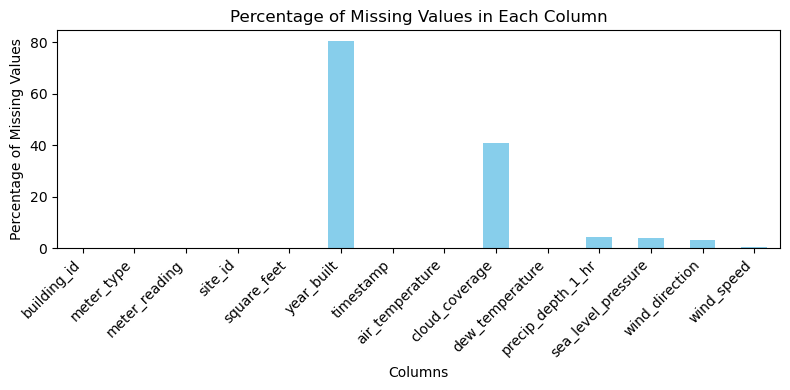

In [21]:
# Plotting the null values
# Assuming healthcare_df is your DataFrame
missing_percentage = healthcare_df.isna().mean() * 100

plt.figure(figsize=(8, 4))
missing_percentage.plot(kind='bar', color='skyblue')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.title('Percentage of Missing Values in Each Column')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

***Insights***\
There are two columns with >40% of null values and three near to 4% null values. Each column will be analyzed to either drop it or fill in missing data.

#### 1.2.2.1 'year_built' null values analysis
The objective is to review this column to decide whether to remove it entirely or handle its missing data.

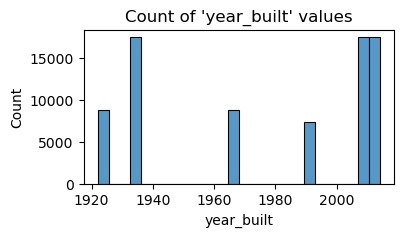

In [22]:
#  Plot
# Set the figure size
plt.figure(figsize=(4, 2))

# Create a histogram plot with Seaborn
sns.histplot(healthcare_df['year_built'])
plt.title("Count of 'year_built' values")
plt.show()

In [23]:
# Percentage of current values
healthcare_df['year_built'].value_counts(normalize=True)

year_built
1934.0    0.226387
2010.0    0.226013
1922.0    0.113342
1966.0    0.113342
2014.0    0.113316
2012.0    0.112994
1990.0    0.094606
Name: proportion, dtype: float64

***Insights***
- This column will be retained for visualization analysis but omitted from the modeling process. 
It's unfortunate because this type of information would serve as n importantl predictor for energy consumption.
- 80.6 % records missing, which makes it too many to impute.

#### 1.2.2.2. `cloud_coverage` null values
The goal is to assess this column and determine whether to completely remove it or address the missing data within it.

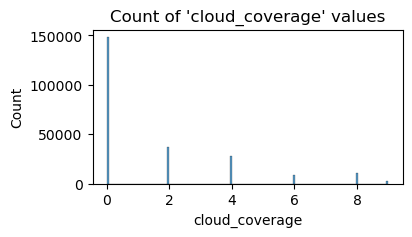

In [24]:
# Plot
# Set the figure size
plt.figure(figsize=(4, 2))

# Create a histogram plot with Seaborn
sns.histplot(healthcare_df['cloud_coverage'])
plt.title("Count of 'cloud_coverage' values")
plt.show()

In [25]:
# Percentage of current values
healthcare_df['cloud_coverage'].value_counts()/healthcare_df['cloud_coverage'].count()

cloud_coverage
0.0    0.631388
2.0    0.156045
4.0    0.120315
8.0    0.046317
6.0    0.034897
9.0    0.011037
Name: count, dtype: float64

***Insight***
- This column will be retained for visualization analysis but omitted from the modeling process. Retaining this column isn't critical, as this specific information doesn't significantly impact energy consumption predictions.
- 40.9 % records missing and of the remaining 63% equal to zero. which makes it too many to impute.

#### 1.2.2.3. `precip_depth_1_hr` null values
The objective is to evaluate this column and decide between completely removing it or handling the missing data contained within it.

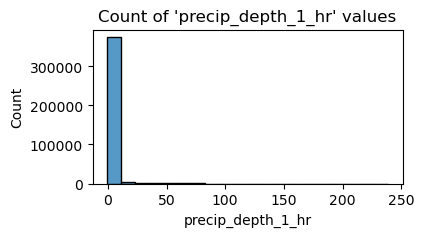

In [26]:
#  Plot
# Set the figure size
plt.figure(figsize=(4, 2))

# Create a histogram plot with Seaborn
sns.histplot(healthcare_df['precip_depth_1_hr'])
plt.title("Count of 'precip_depth_1_hr' values")
plt.show()

In [27]:
# Percentage of values
healthcare_df['precip_depth_1_hr'].value_counts()/healthcare_df['precip_depth_1_hr'].count()

precip_depth_1_hr
 0.0      0.879589
-1.0      0.064660
 3.0      0.017646
 5.0      0.008413
 8.0      0.005606
            ...   
 132.0    0.000005
 147.0    0.000003
 211.0    0.000003
 180.0    0.000003
 239.0    0.000003
Name: count, Length: 71, dtype: float64

***Insight***
- While this column will be used for visualization analysis, it won't be included in the modeling process. Its retention isn't crucial as the information it holds doesn't notably influence energy consumption predictions.
- 4 % records missing and of the remaining 87% equal to zero and 6.4 equal to -1 (label for non information). The prevalence of zero values makes it impractical to attempt replacing the missing values.

#### 1.2.2.4 `sea_level_pressure` null values

The goal is to assess this column and make a decision regarding whether to entirely remove it or manage the missing data it contains 

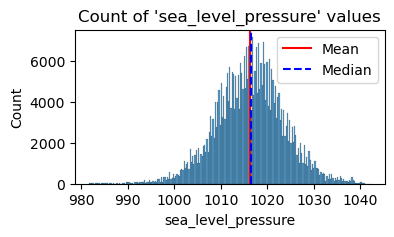

In [28]:
#  Plot
# Set the figure size
plt.figure(figsize=(4, 2))

# Adding statistical lines and legend
plt.axvline(healthcare_df['sea_level_pressure'].mean(), 0, 2000, c='r', label='Mean')
plt.axvline(healthcare_df['sea_level_pressure'].median(), 0, 2000, c='b', linestyle='--', label='Median')
plt.legend()

# Create a histogram plot with Seaborn
sns.histplot(healthcare_df['sea_level_pressure'])
plt.title("Count of 'sea_level_pressure' values")
plt.show()

***Insight***
- 3.6 % records are missing.
- Replace missing values with the mean, since it is the same as the median

In [29]:
# Replace missing values with the mean
healthcare_df['sea_level_pressure'].fillna(healthcare_df['sea_level_pressure'].mean(), inplace=True)

In [30]:
# Check Percentage of null values per column equal to zero
healthcare_df['sea_level_pressure'].isna().sum()

0

#### 1.2.2.5 `wind_direction` null values
The objective is to evaluate this column and determine whether to eliminate it entirely or address its missing data.

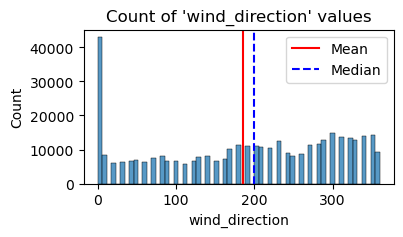

In [31]:
#  Plot
# Set the figure size
plt.figure(figsize=(4, 2))
plt.axvline(healthcare_df['wind_direction'].mean(), 0, 2000, c='r', label='Mean')
plt.axvline(healthcare_df['wind_direction'].median(), 0, 2000, c='b', linestyle='--', label='Median')
plt.legend()

# Create a histogram plot with Seaborn
sns.histplot(healthcare_df['wind_direction'])
plt.title("Count of 'wind_direction' values")
plt.show()

In [32]:
# Percentage of current values
healthcare_df['wind_direction'].value_counts()/healthcare_df['wind_direction'].count()

wind_direction
0.0      0.111684
300.0    0.038260
350.0    0.037093
340.0    0.036476
310.0    0.035520
320.0    0.034675
290.0    0.033441
330.0    0.032922
230.0    0.032290
280.0    0.030182
270.0    0.029363
180.0    0.029127
200.0    0.028310
190.0    0.028251
210.0    0.027808
220.0    0.027224
170.0    0.026330
360.0    0.024378
240.0    0.023510
260.0    0.022501
10.0     0.022141
140.0    0.021301
80.0     0.020834
250.0    0.020637
130.0    0.020096
70.0     0.019660
160.0    0.018732
50.0     0.017578
40.0     0.017493
90.0     0.017428
150.0    0.017296
120.0    0.017262
100.0    0.016928
30.0     0.016306
60.0     0.016088
20.0     0.015715
110.0    0.015092
202.0    0.000070
Name: count, dtype: float64

***Insight***
- 3.1% records are missing.
- Replace missing values with the mean, since it is the same as the median

In [33]:
# Replace missing values with the mean
healthcare_df['wind_direction'].fillna(healthcare_df['wind_direction'].mean(), inplace=True)

In [34]:
# Check Percentage of null values per column equal to zero
healthcare_df['wind_direction'].isna().sum()

0

#### 1.2.2.6 `wind_speed` null values

The aim is to assess this column and make a decision on whether to entirely remove it or address its missing data

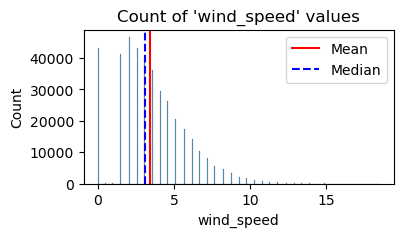

In [35]:
#  Plot
# Set the figure size
plt.figure(figsize=(4, 2))
plt.axvline(healthcare_df['wind_speed'].mean(), 0, 2000, c='r', label='Mean')
plt.axvline(healthcare_df['wind_speed'].median(), 0, 2000, c='b', linestyle='--', label='Median')
plt.legend()

# Create a histogram plot with Seaborn
sns.histplot(healthcare_df['wind_speed'])
plt.title("Count of 'wind_speed' values")
plt.show()

In [36]:
# Percentage of current values
healthcare_df['wind_speed'].value_counts()/healthcare_df['wind_speed'].count()

wind_speed
2.1     0.117426
2.6     0.108627
0.0     0.108461
1.5     0.103863
3.1     0.100349
3.6     0.090938
4.1     0.073924
4.6     0.065971
5.1     0.051750
5.7     0.043583
6.2     0.035302
6.7     0.026040
7.2     0.020767
7.7     0.014392
8.2     0.011678
8.8     0.008386
9.3     0.005414
9.8     0.004098
10.3    0.002469
10.8    0.002089
11.3    0.001269
11.8    0.000891
12.4    0.000541
1.0     0.000506
12.9    0.000347
13.4    0.000242
0.5     0.000176
13.9    0.000169
14.9    0.000083
2.2     0.000060
14.4    0.000058
16.0    0.000045
1.3     0.000023
15.4    0.000018
17.0    0.000015
10.0    0.000015
13.0    0.000005
16.5    0.000003
18.5    0.000003
8.0     0.000003
7.0     0.000003
Name: count, dtype: float64

***Insight***
- 0.2% records are missing.
- Replace missing values with the mean, since it is the same as the median

In [37]:
# Replace missing values with the mean
healthcare_df['wind_speed'].fillna(healthcare_df['wind_speed'].mean(), inplace=True)

In [38]:
# Check Percentage of null values per column equal to zero
healthcare_df['wind_speed'].isna().sum()

0

#### 1.2.2.7 `timestamp` null values

The aim is to assess this column and make a decision on whether to entirely remove it or address its missing data

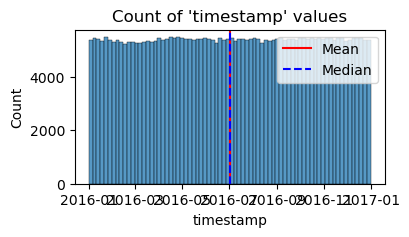

In [39]:
#  Plot
# Set the figure size
plt.figure(figsize=(4, 2))
plt.axvline(healthcare_df['timestamp'].mean(), 0, 2000, c='r', label='Mean')
plt.axvline(healthcare_df['timestamp'].median(), 0, 2000, c='b', linestyle='--', label='Median')
plt.legend()

# Create a histogram plot with Seaborn
sns.histplot(healthcare_df['timestamp'])
plt.title("Count of 'timestamp' values")
plt.show()

In [40]:
# Filtering timestamp rows with null values
healthcare_df[healthcare_df['timestamp'].isnull()]

,building_id,meter_type,meter_reading,site_id,square_feet,year_built,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
16675,208,0,25.9300,2,36904,1934.0,NaT,NaN,NaN,NaN,NaN,1016.294189,186.147621,3.449965
16676,208,1,9.0383,2,36904,1934.0,NaT,NaN,NaN,NaN,NaN,1016.294189,186.147621,3.449965
22130,365,0,1747.2000,3,819577,1922.0,NaT,NaN,NaN,NaN,NaN,1016.294189,186.147621,3.449965
22132,365,0,1740.2400,3,819577,1922.0,NaT,NaN,NaN,NaN,NaN,1016.294189,186.147621,3.449965
22134,365,0,1729.2000,3,819577,1922.0,NaT,NaN,NaN,NaN,NaN,1016.294189,186.147621,3.449965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397985,1388,1,36.3804,15,45465,1990.0,NaT,NaN,NaN,NaN,NaN,1016.294189,186.147621,3.449965
398174,1388,1,9.3029,15,45465,1990.0,NaT,NaN,NaN,NaN,NaN,1016.294189,186.147621,3.449965
398245,1388,1,0.0000,15,45465,1990.0,NaT,NaN,NaN,NaN,NaN,1016.294189,186.147621,3.449965
398340,1388,1,32.3964,15,45465,1990.0,NaT,NaN,NaN,NaN,NaN,1016.294189,186.147621,3.449965


***Insights***
- 0.13% of records, totaling 515 rows, lack most weather values. This might suggest unmatched rows after merging meter and weather CSV files.
- Drop rows with missing timestamp values, since the weather data will be required in the modelling phase. 

In [41]:
# Dropping timestamp rows with null values
healthcare_df.dropna(subset=['timestamp'], inplace=True)

In [42]:
# Check Percentage of null values per column equal to zero
healthcare_df['timestamp'].isna().sum()

0

#### 1.2.2.8 `air_temperature` null values

The aim is to assess this column and make a decision on whether to entirely remove it or address its missing data

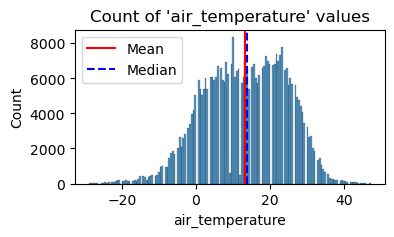

In [43]:
#  Plot
# Set the figure size
plt.figure(figsize=(4, 2))
plt.axvline(healthcare_df['air_temperature'].mean(), 0, 2000, c='r', label='Mean')
plt.axvline(healthcare_df['air_temperature'].median(), 0, 2000, c='b', linestyle='--', label='Median')
plt.legend()

# Create a histogram plot with Seaborn
sns.histplot(healthcare_df['air_temperature'])
plt.title("Count of 'air_temperature' values")
plt.show()

In [44]:
# Percentage of current values
healthcare_df['air_temperature'].value_counts()/healthcare_df['air_temperature'].count()

air_temperature
 10.0    0.021001
 23.3    0.019499
 21.7    0.018541
 22.8    0.018443
 13.3    0.017744
           ...   
 34.0    0.000005
 30.4    0.000005
 16.2    0.000005
-11.0    0.000005
-6.0     0.000003
Name: count, Length: 179, dtype: float64

***Insights***
- 0.016% records are missing.
- Replace missing values with the mean, since it is the same as the median

In [45]:
# Replace missing values with the mean
healthcare_df['air_temperature'].fillna(healthcare_df['air_temperature'].mean(), inplace=True)

In [46]:
# Check Percentage of null values per column equal to zero
healthcare_df['air_temperature'].isna().sum()

0

#### 1.2.2.9 `dew_temperature` null values

The aim is to assess this column and make a decision on whether to entirely remove it or address its missing data

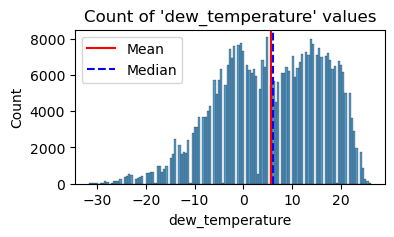

In [47]:
#  Plot
# Set the figure size
plt.figure(figsize=(4, 2))
plt.axvline(healthcare_df['dew_temperature'].mean(), 0, 2000, c='r', label='Mean')
plt.axvline(healthcare_df['dew_temperature'].median(), 0, 2000, c='b', linestyle='--', label='Median')
plt.legend()

# Create a histogram plot with Seaborn
sns.histplot(healthcare_df['dew_temperature'])
plt.title("Count of 'dew_temperature' values")
plt.show()

In [48]:
# Percentage of current values
healthcare_df['dew_temperature'].value_counts()/healthcare_df['dew_temperature'].count()

dew_temperature
 5.0     0.020326
-0.6     0.019497
 14.4    0.019419
-1.1     0.018906
-1.7     0.018816
           ...   
 4.8     0.000005
 4.7     0.000005
-3.6     0.000005
 5.2     0.000005
 9.1     0.000005
Name: count, Length: 143, dtype: float64

***Insights***
- 0.019% records are missing.
- Replace missing values with the mean, since it is the same as the median

In [49]:
# Replace missing values with the mean
healthcare_df['dew_temperature'].fillna(healthcare_df['dew_temperature'].mean(), inplace=True)

In [50]:
# Check Percentage of null values per column equal to zero
healthcare_df['dew_temperature'].isna().sum()

0

In [51]:
# Sanity check for percentage of null values per column
healthcare_df.isna().mean()*100

building_id            0.000000
meter_type             0.000000
meter_reading          0.000000
site_id                0.000000
square_feet            0.000000
year_built            80.611671
timestamp              0.000000
air_temperature        0.000000
cloud_coverage        40.880470
dew_temperature        0.000000
precip_depth_1_hr      3.955858
sea_level_pressure     0.000000
wind_direction         0.000000
wind_speed             0.000000
dtype: float64

***Insight***
- Columns containing missing values will be dropped before the modeling phase

[back to TOC](#toc)

<a id='hea-23'></a>

### 1.2.3 Duplicate values

In [52]:
# Dataset duplicated rows. 
healthcare_df.duplicated().sum()

# Calculate the percentage of duplicate rows
total_rows = len(healthcare_df)
percentage_duplicates = (healthcare_df.duplicated().sum() / total_rows) * 100
percentage_duplicates

0.0

***Insight***
- Given that there are only 0.002% duplicate rows, it's safe to drop them without concern for their impact on our results.

[back to TOC](#toc)

<a id='hea-3'></a>

## 1.2. Data visualization
Data set visualizations are valuable as they present complex information in a visually understandable format, aiding in identifying patterns, trends, and relationships within the data at a glance. Only the numerical columns will be used, having the target variable 'Reviewer_Score' as the main interest in the visualizations.

[back to TOC](#toc)

<a id='hea-31'></a>

### 1.2.2. Numerical columns analysis
We'll exclusively analyze columns containing numeric values to extract insights from them.

In [53]:
# Group numeric columns
numeric = list(healthcare_df.select_dtypes(exclude='object').columns)
print(numeric)

['building_id', 'meter_type', 'meter_reading', 'site_id', 'square_feet', 'year_built', 'timestamp', 'air_temperature', 'cloud_coverage', 'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure', 'wind_direction', 'wind_speed']


In [54]:
# Statistic overview
healthcare_df[numeric].describe()

,building_id,meter_type,meter_reading,site_id,square_feet,year_built,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,397992.000000,397992.000000,397992.000000,397992.000000,397992.000000,77164.000000,397992,397992.000000,235291.000000,397992.000000,382248.000000,397992.000000,397992.000000,397992.000000
mean,1093.345861,0.859047,739.019013,11.638897,138512.563572,1976.571847,2016-07-02 09:46:01.219321088,13.303335,1.472606,5.582175,0.747271,1016.294189,186.147621,3.449965
min,208.000000,0.000000,0.000000,2.000000,9813.000000,1922.000000,2016-01-01 00:00:00,-28.900000,0.000000,-31.700000,-1.000000,981.600000,0.000000,0.000000
25%,1207.000000,0.000000,33.980000,13.000000,35354.000000,1934.000000,2016-04-02 11:00:00,5.000000,0.000000,-2.200000,0.000000,1011.700000,90.000000,2.100000
50%,1243.000000,1.000000,212.000000,14.000000,115788.000000,1990.000000,2016-07-02 13:00:00,13.303335,0.000000,6.100000,0.000000,1016.294189,190.000000,3.100000
75%,1285.000000,2.000000,783.330750,14.000000,200000.000000,2010.000000,2016-10-01 23:00:00,22.200000,2.000000,14.400000,0.000000,1020.800000,290.000000,4.600000
max,1388.000000,3.000000,28189.500000,15.000000,819577.000000,2014.000000,2016-12-31 23:00:00,47.200000,9.000000,26.100000,239.000000,1042.200000,360.000000,18.500000
std,328.897143,0.944554,1364.991818,4.331415,141200.746274,36.542222,NaN,10.982794,2.344205,10.645529,6.126940,7.164691,114.846655,2.221545


**Insights**
- `meter_reading` is strongly positive skewed since the mean is far higher than the 50th percentile.

[back to TOC](#toc)

<a id='hea-32'></a>

### 1.2.2. Data distribution

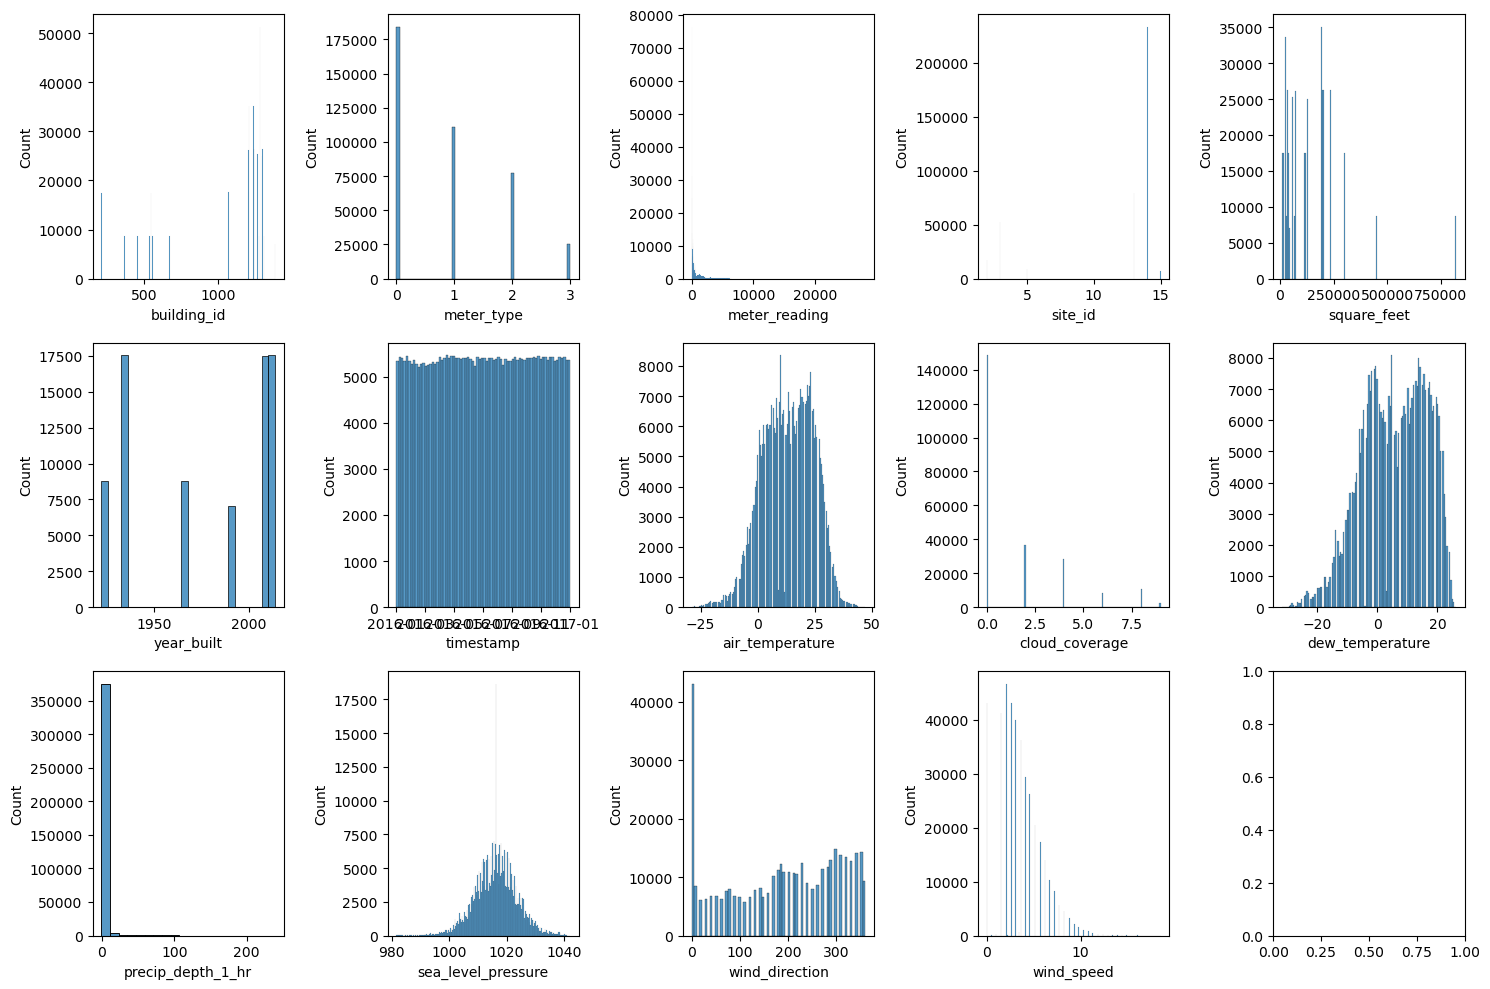

In [55]:
# Plotting the histograms 
plt.subplots(3,5, figsize=(15,10))

counter=1

for i in list(numeric):
    plt.subplot(3,5,counter)
    sns.histplot(healthcare_df[i])
    counter+=1

# Ensure proper spacing and no overlapping
plt.tight_layout()
plt.show()

***Insights***
- Positive skewness for: `meter_reading`, `wind_speed`
- Bimodal distribution for `dew_temperature`
- Categorical structure for `meter_type`, `cloud_coverage`
- Normal distribution for: `sea_level_presure`

[back to TOC](#toc)

<a id='hea-33'></a>

### 1.2.3. Building ID and meter types

We'll visualize therelationshipn between healthcare buildings and the meters available for each of the buildings.

In [56]:
# Quantity of buildings available
healthcare_df['building_id'].nunique()

23

In [57]:
# Percentage of energy data points for each building
healthcare_df['building_id'].value_counts(normalize=True)

building_id
1241    0.088163
1303    0.066160
1245    0.066122
1286    0.066119
1243    0.066114
1207    0.065775
1269    0.063732
1285    0.062825
1300    0.062552
1072    0.044137
1208    0.044129
1209    0.044127
208     0.044079
365     0.022061
547     0.022056
455     0.022056
1282    0.022053
1313    0.022053
670     0.021998
548     0.021995
535     0.021995
556     0.021993
1388    0.017706
Name: proportion, dtype: float64

In [58]:
# Extracting unique values from the 'meter_type' column and converting to a list
meter_values = healthcare_df['meter_type'].unique().tolist()

print(meter_values)

[0, 1, 2, 3]


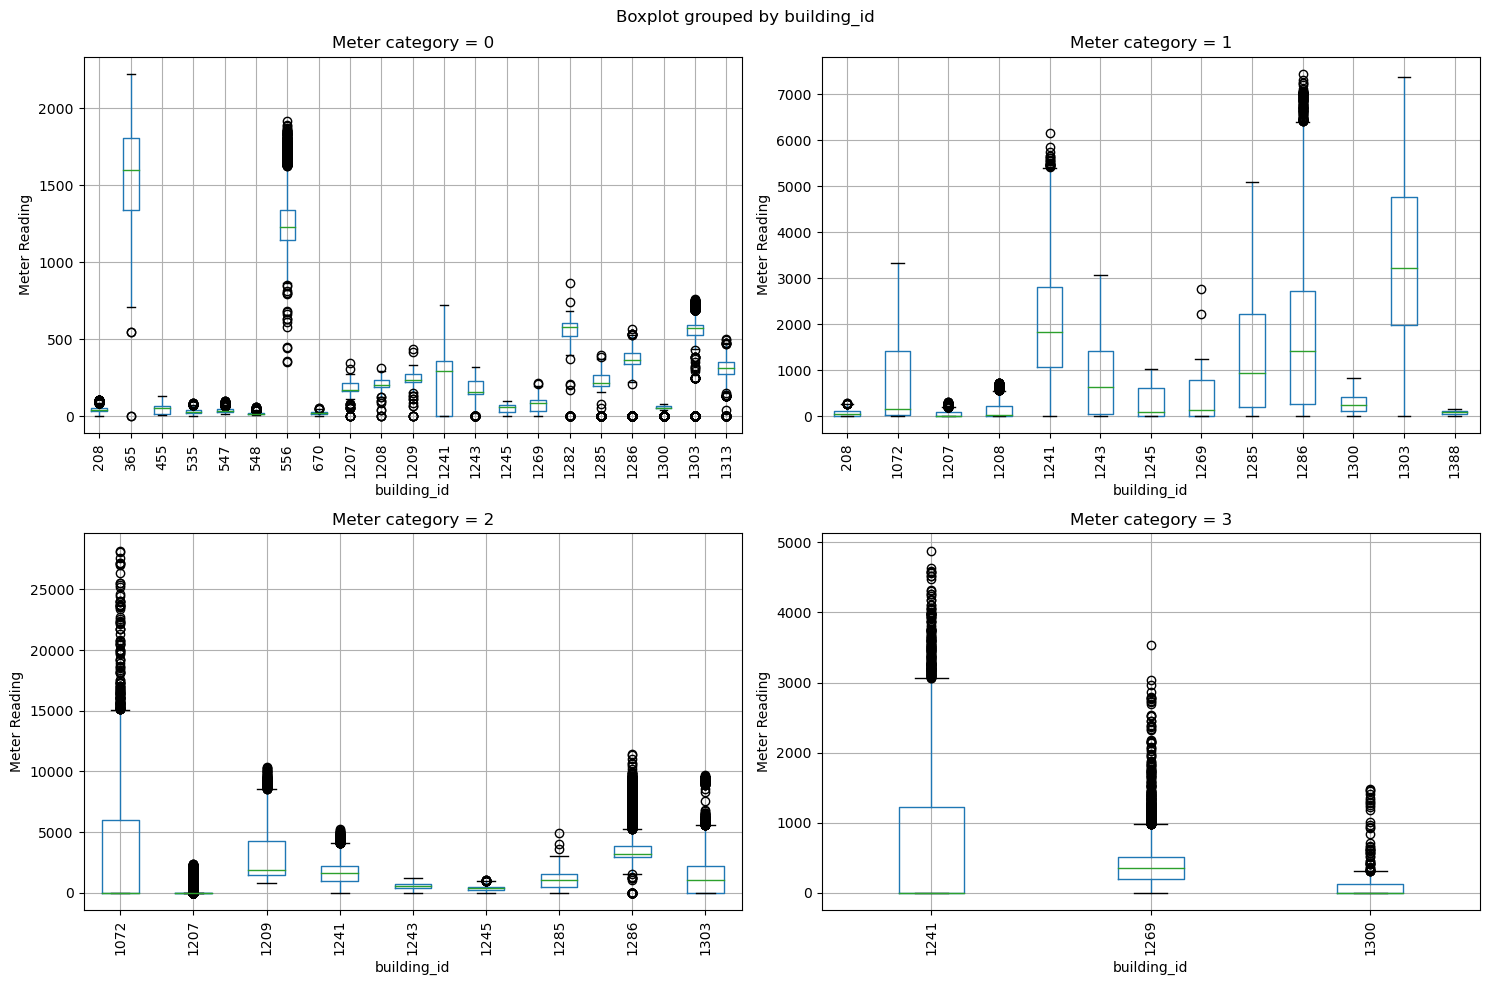

In [59]:
# Plotting data for 'meter' category 0: electricity, 1: chilled water, 2: steam, 3: hot water
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

counter = 0  # Start the counter at index 0

for i, ax in zip(meter_values, axes.flatten()):
    meter_data = healthcare_df[healthcare_df['meter_type'] == i]
    meter_data.boxplot(column='meter_reading', by='building_id', ax=ax)
    ax.set_title(f'Meter category = {i}')  # Set subplot title
    
    counter += 1  # Increment counter

    ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels
    ax.set_ylabel('Meter Reading')  # Set y-axis label

# Ensure proper spacing and no overlapping
plt.tight_layout()
# Rotating x-labels to 45 degrees
plt.xticks(rotation=90)

plt.show()

**Insights**
- Not all 21 buildings have the 4 energy meters. Hence, it would be visualized only the meter_type for electricity (value 0) for the 3 buildings with more energy measurements.
- The meter_type for electricity refers only to plug loads. 
Plug loads refer to the energy consumed by devices or appliances that are plugged into electrical outlets within a building. 
- For the same meter each building have a different range of values. Which could be related to different floor area.

In [60]:
# Percentage of energy data points for each building with
healthcare_df[healthcare_df['meter_type'] == 0]['building_id'].value_counts(normalize=True)

building_id
1208    0.047661
365     0.047661
1209    0.047655
455     0.047650
547     0.047650
1245    0.047645
1303    0.047645
1300    0.047645
1286    0.047645
1285    0.047645
1282    0.047645
1269    0.047645
1313    0.047645
1243    0.047645
1207    0.047645
1241    0.047639
208     0.047558
670     0.047525
548     0.047520
535     0.047520
556     0.047514
Name: proportion, dtype: float64

***Insights***
- Since all buildings have a similar amount of data points, three Buildings are selected randomly for further visualization: 1313, 1282, 1303

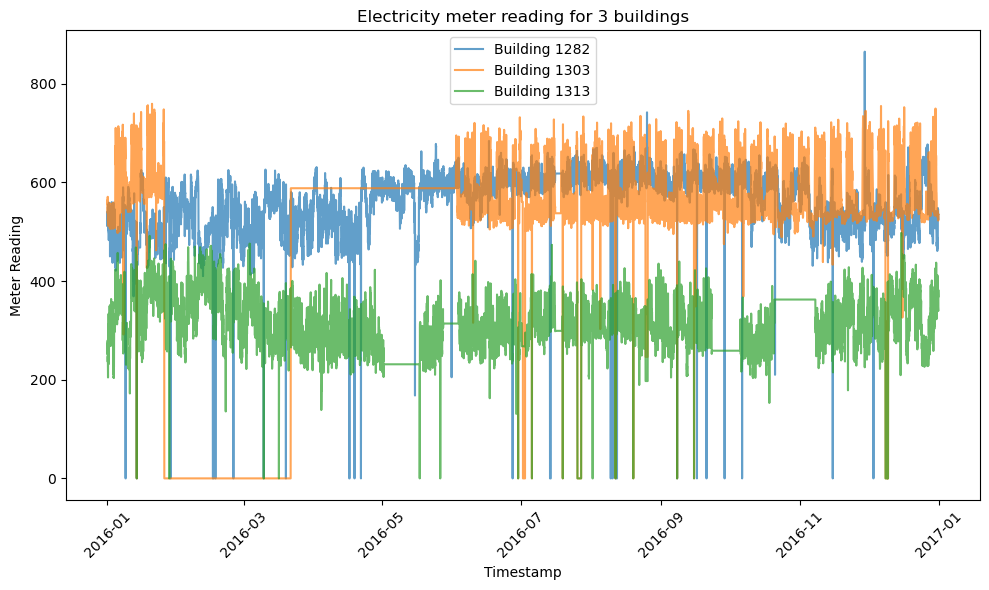

In [61]:
# Plot for specific buildings, for meter_type electricity 
# Specify building IDs of interest
building_ids_of_interest = [1313, 1282, 1303]

# Filter the 'health' DataFrame for the specified building IDs and meter_type
filtered_data = healthcare_df[(healthcare_df['building_id'].isin(building_ids_of_interest)) & (healthcare_df['meter_type'] == 0)]

plt.figure(figsize=(10, 6))

# Plotting each building's data separately
for building_id, group_data in filtered_data.groupby('building_id'):
    plt.plot(group_data['timestamp'], group_data['meter_reading'], linestyle='-', label=f"Building {building_id}", alpha=0.7)

plt.xlabel('Timestamp')
plt.ylabel('Meter Reading')
plt.title("Electricity meter reading for 3 buildings")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

***Insights***
- We'll proceed with the analysis focusing on building 1282 as it exhibits a more consistent pattern in its electricity measurements.

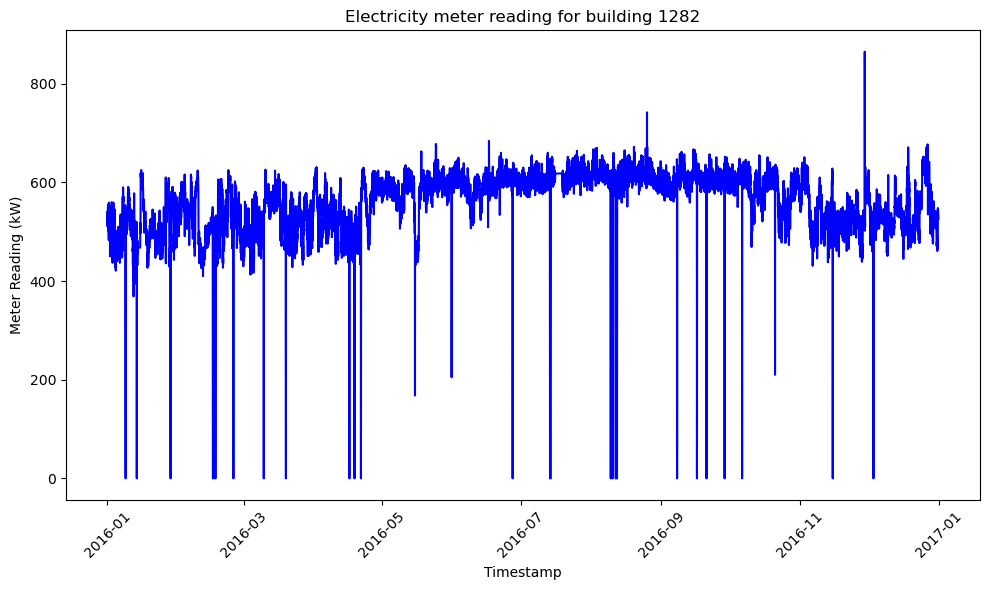

In [62]:
# Electricity plot only for building 1282 
# Assuming 'health' DataFrame contains your data
filtered_data = healthcare_df[(healthcare_df['building_id'] == 1282) & (healthcare_df['meter_type'] == 0)]

plt.figure(figsize=(10, 6))
plt.plot(filtered_data['timestamp'], filtered_data['meter_reading'], linestyle='-', color='b')
plt.xlabel('Timestamp')
plt.ylabel('Meter Reading (kW)')
plt.title("Electricity meter reading for building 1282")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

***Insights***\
The electricity plot above indicates:
- It reveals seasonality in energy consumption over time, summer consumption is higher than winter.
- The trend is stable, meaning that it is flat for each season.
- Variation between peaks and troughs values is higher for summer season. About 200 kW for winter and 100 kW for summer.
- Cycles observed during the year: high, between May and October and low for the remainder months. 
- Sudden spikes or drops could indicate irregular usage, potential faults, or anomalies that need further investigation.
- No relationships between timestamped events (like specific hours of the day, weekdays, or seasons) and energy consumption can be observed. A monthly analysis will be conducted to explore potential relationships.

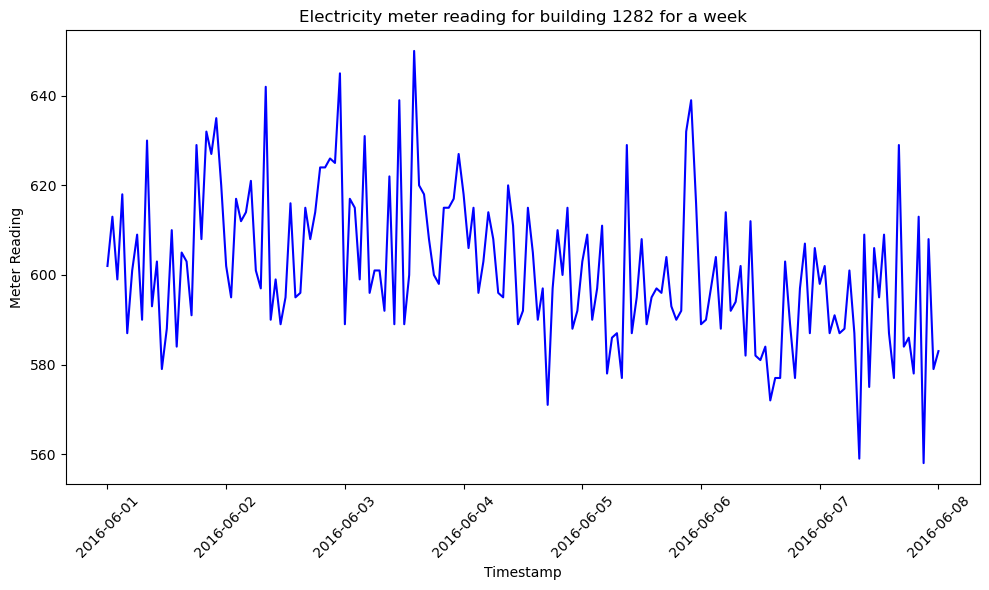

In [63]:
# Weekly subset for looking for cycles in the data
# Convert 'timestamp' column to datetime format
healthcare_df['timestamp'] = pd.to_datetime(healthcare_df['timestamp'])

# Filter the 'health' DataFrame for the specified conditions (building ID, meter_type, and timestamp range)
filtered_data = healthcare_df[
    (healthcare_df['building_id'] == 1282) &
    (healthcare_df['meter_type'] == 0) &
    (healthcare_df['timestamp'].between('2016-06-01', '2016-06-08'))
]

plt.figure(figsize=(10, 6))

# Plotting the data for building_id=1282 within the specified timestamp range
plt.plot(filtered_data['timestamp'], filtered_data['meter_reading'], linestyle='-', color='b')

plt.xlabel('Timestamp')
plt.ylabel('Meter Reading')
plt.title("Electricity meter reading for building 1282 for a week")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

***Insights***\
The electricy plot above indicates no relationships between timestamped events (like specific hours of the day, weekdays, or seasons) and energy consumption.

[back to TOC](#toc)

<a id='hea-34'></a>

### 1.2.4. Meter variables

#### 1.2.4.1 Meter type

In [64]:
# Percentage of unique 'meter' values
healthcare_df['meter_type'].value_counts(normalize=True)

meter_type
0    0.462869
1    0.278847
2    0.194652
3    0.063632
Name: proportion, dtype: float64

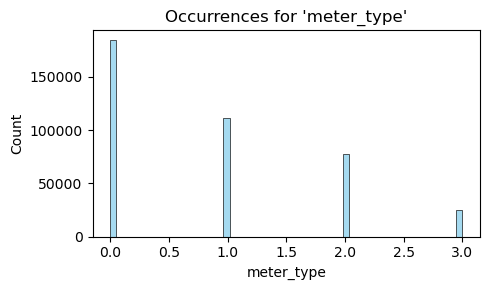

In [65]:
# Plot
plt.figure(figsize=(5,3))
sns.histplot(healthcare_df['meter_type'], color='skyblue')

plt.title("Occurrences for 'meter_type'")
plt.tight_layout()
plt.show()

***Insights***\
There is a categorical structure for this variable

#### 1.2.4.2. Meter reading

In [66]:
# Percentage of unique values
healthcare_df['meter_reading'].value_counts(normalize=True)

meter_reading
0.0000       0.087597
588.1900     0.004387
0.3748       0.002294
0.3332       0.002214
362.5400     0.001093
               ...   
136.7830     0.000003
1707.9500    0.000003
434.7430     0.000003
139.7830     0.000003
29.4019      0.000003
Name: proportion, Length: 195099, dtype: float64

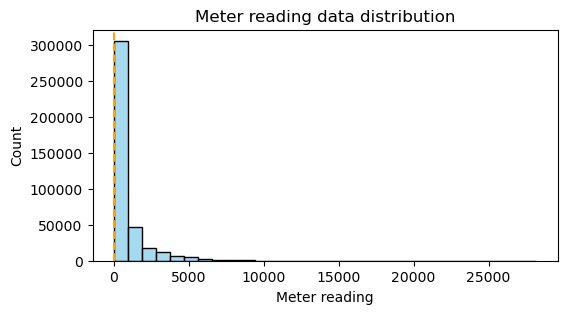

In [67]:
# Investigate meter_reading values for the full range of values
# Create histogram using Seaborn
plt.figure(figsize=(6,3))
sns.histplot(healthcare_df['meter_reading'], bins=30, color='skyblue')

# Adding a dotted vertical line where to zoom in
plt.axvline(x=1, color='orange', linestyle='--')

plt.xlabel('Meter reading')
plt.ylabel('Count')
plt.title('Meter reading data distribution')

plt.show()

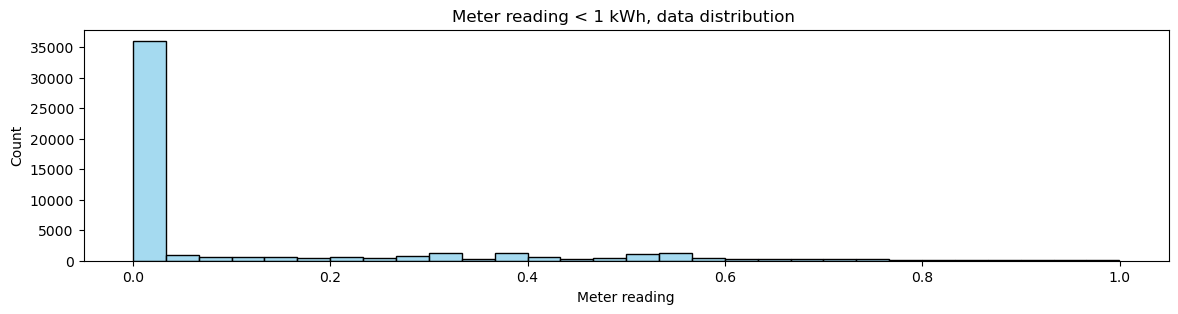

In [68]:
# Plot for count of meter_reading < 1

# Filtering data for 'meter_reading' 
filtered_data = healthcare_df[healthcare_df['meter_reading'] < 1]

# Creating a histogram using Seaborn
plt.figure(figsize=(14,3))
sns.histplot(filtered_data['meter_reading'], bins=30, color='skyblue')

plt.xlabel('Meter reading')
plt.ylabel('Count')
plt.title('Meter reading < 1 kWh, data distribution ')

plt.show()

***Insights***
- Presents positive skew data with a lot of values near zero.
- Values are in kWh units which are too small for hourly readings, consider changing units to Wh.
- 8.7% of meter reading equal to zero (0)

[back to TOC](#toc)

<a id='hea-35'></a>

### 1.2.5. Weather variables

#### 1.2.5.1. Dew temperature

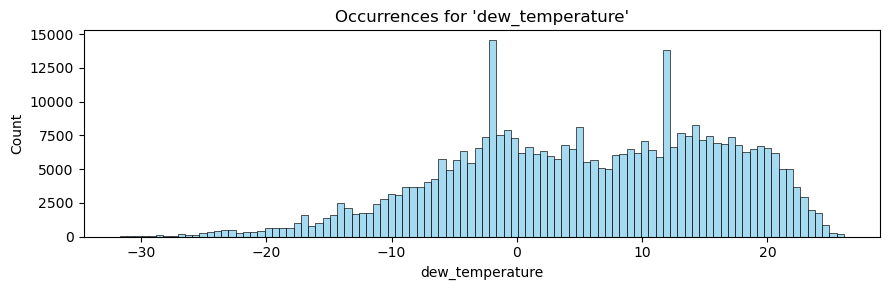

In [69]:
# Investigate meter_reading values for the full range of meter_reading values
# Create histogram using Seaborn
plt.figure(figsize=(9,3))
sns.histplot(healthcare_df['dew_temperature'], bins=100, color='skyblue')
plt.title("Occurrences for 'dew_temperature'")
plt.tight_layout()
plt.show()

***Insights***
- Exhibiting a bimodal distribution, indicating the presence of two distinct clusters of data, possibly suggesting diverse locations and climates.

#### 1.2.5.2. Cloud Coverage

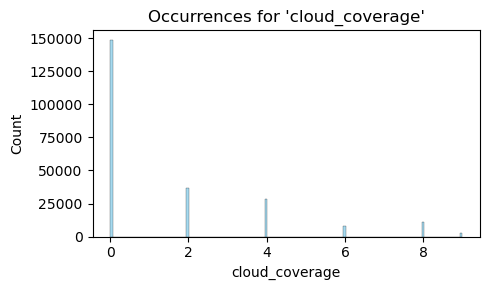

In [70]:
# Plot for 'cloud_coverage'
plt.figure(figsize=(5,3))
sns.histplot(healthcare_df['cloud_coverage'], color='skyblue')
plt.title("Occurrences for 'cloud_coverage'")
plt.tight_layout()
plt.show()

***Insights***\
There is a categorical structure for this variable

[back to TOC](#toc)

<a id='hea-40'></a>

# 2. Statistical Analysis
Statistical analysis will help reveal patterns, relationships, and trends crucial for understanding customer preferences and guiding decisions to enhance hotel service and satisfaction..

[back to TOC](#toc)

<a id='hea-41'></a>

## 2.1. Columns correlation
In this section, we aim to determine the columns that exhibit positive or negative correlations with the target variable (meter_reading) and assess the statistical significance of these correlations

**Preparing data**\
To carry on the correlation analysis only the columns with numerical values will be used.

In [71]:
healthcare_df.head()

,building_id,meter_type,meter_reading,site_id,square_feet,year_built,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,208,0,77.2900,2,36904,1934.0,2016-01-01 00:00:00,15.6,6.0,-5.6,NaN,1015.3,270.0,3.6
1,208,1,0.1055,2,36904,1934.0,2016-01-01 00:00:00,15.6,6.0,-5.6,NaN,1015.3,270.0,3.6
2,208,0,87.0900,2,36904,1934.0,2016-01-01 01:00:00,13.9,NaN,-5.6,0.0,1015.6,270.0,4.1
3,208,1,0.1407,2,36904,1934.0,2016-01-01 01:00:00,13.9,NaN,-5.6,0.0,1015.6,270.0,4.1
4,208,0,90.5100,2,36904,1934.0,2016-01-01 02:00:00,13.3,2.0,-5.6,0.0,1016.0,270.0,3.1


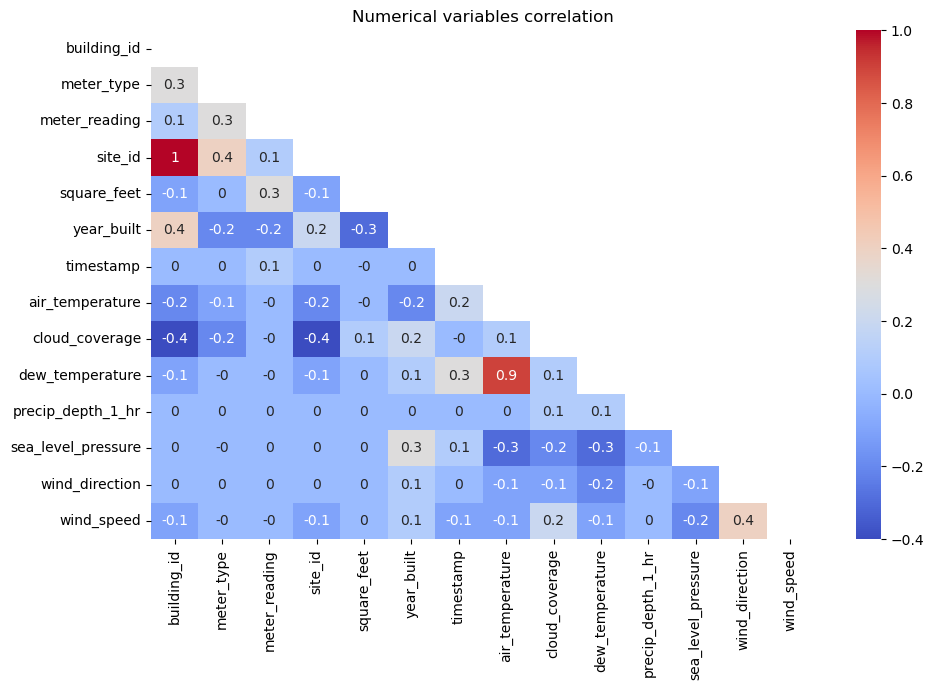

In [72]:
# Correlation of the variables in a heatmap for an initial idea
plt.figure(figsize=(10, 7))
matrix = np.triu(healthcare_df.corr())
sns.heatmap(healthcare_df.corr().round(1), annot=True, mask=matrix, cmap='coolwarm')
plt.title("Numerical variables correlation")
plt.tight_layout()
plt.show()

In [73]:
# Collect correlation coefficients to enable a more detailed visualization. 
# While the heat map offers an initial insight into correlations, a closer visualization can enhance the understanding of the information.

corr_coef = healthcare_df.corr()
corr_coef = pd.DataFrame(corr_coef['meter_reading'])
corr_coef.drop(index='meter_reading', inplace=True)
corr_coef.columns=['Correlation_Coefficient']
corr_coef

,Correlation_Coefficient
building_id,0.122349
meter_type,0.269840
site_id,0.138636
square_feet,0.325245
year_built,-0.224881
timestamp,0.062321
air_temperature,-0.027512
cloud_coverage,-0.033787
dew_temperature,-0.002399
precip_depth_1_hr,0.002167


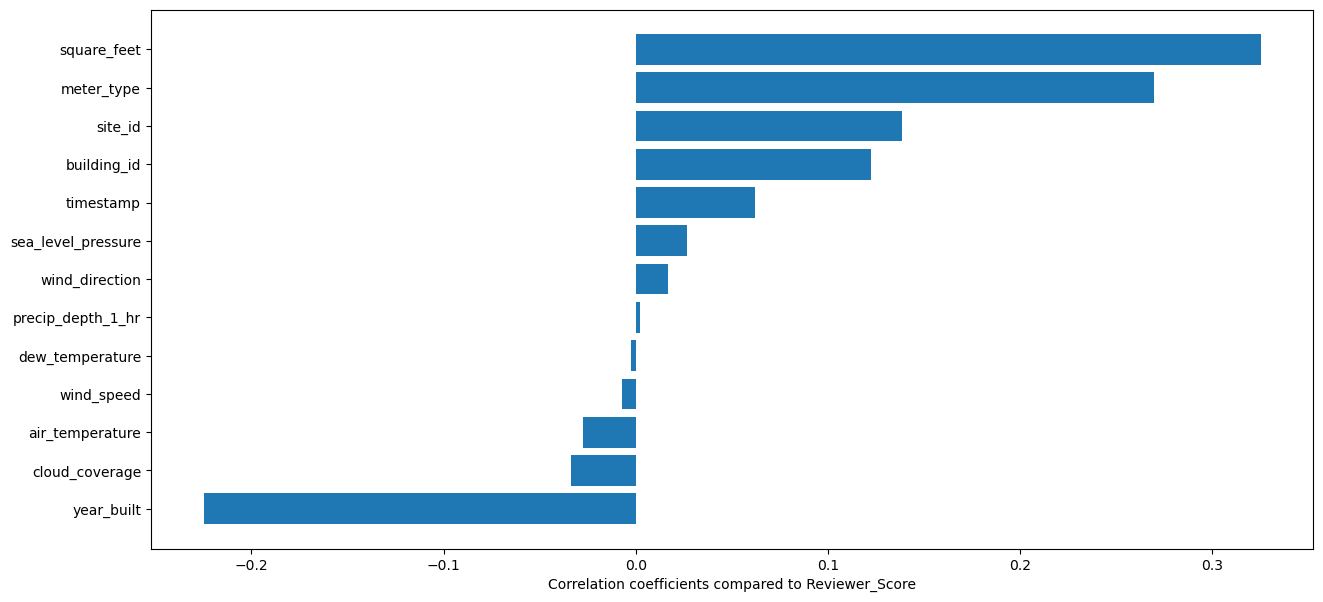

In [74]:
# Visualization and comparison of correlation coefficients.
corr_coef.sort_values(by='Correlation_Coefficient', inplace=True)

plt.figure(figsize=(15,7))
plt.barh(corr_coef.index,corr_coef['Correlation_Coefficient'])
plt.xlabel('Correlation coefficients compared to Reviewer_Score')
plt.show()

***Insights***
- The variable `square_feet` exhibits the highest correlation coefficient, suggesting increased energy consumption with larger building areas.
- Conversely, the `year_built` variable portrays the lowest correlation coefficient, indicating lower energy consumption in older buildings.

In [75]:
# Drop the columns with too many null values. These columns where only used for EDA
healthcare_df.drop(columns=['year_built','cloud_coverage','precip_depth_1_hr'], inplace=True)

In [76]:
# Ensuring that columns have been removed
healthcare_df.head()

,building_id,meter_type,meter_reading,site_id,square_feet,timestamp,air_temperature,dew_temperature,sea_level_pressure,wind_direction,wind_speed
0,208,0,77.2900,2,36904,2016-01-01 00:00:00,15.6,-5.6,1015.3,270.0,3.6
1,208,1,0.1055,2,36904,2016-01-01 00:00:00,15.6,-5.6,1015.3,270.0,3.6
2,208,0,87.0900,2,36904,2016-01-01 01:00:00,13.9,-5.6,1015.6,270.0,4.1
3,208,1,0.1407,2,36904,2016-01-01 01:00:00,13.9,-5.6,1015.6,270.0,4.1
4,208,0,90.5100,2,36904,2016-01-01 02:00:00,13.3,-5.6,1016.0,270.0,3.1


In [77]:
# Export clean 'healthcare_df' dataframe to a csv file
healthcare_df.to_csv('data/03_healthcare_clean.csv', index=False)

[back to TOC](#toc)

We finaly have a clean dataset ready to start modelling as we will see in the '03_modelling_timeseries' notebook.